Using Bertam's Analytic solutions for optimal statistical arbitrage trading and Optimal trading strategies for Ito diffusion processes 

We model the price of a spread $ {s}_{t} $ as,

$$
{s}_{t} = {e}^{{X}_{t}}
$$

Where ${X}_{t} $ satisfies the following stochastic equation, 

$$
{dX}_{t} = {-}\alpha{X}_{t}{dt}{ + }\eta{dW}_{t}
$$

and $\alpha > 0 $, $\eta > 0$, and ${W}_{t}$ is a Wiener process

A continuous time trading strategy is defined by entering a trade when, ${X}_{t} = {a}$, exiting the trade when ${X}_{t} = {m}$, and waiting until the process returns to ${X}_{t} = {a}$ 

The goal of the strategy is to determine appropriate levels for ${a}$ and ${m}$ such that expected return is maximised or maximising with respect to sharpe ratio. 


### Mazimising Expected return
Using equation (18) we can find the value for ${a}$ that maximises expected return for the strategy. Using values obtained for $\alpha$, $\eta$ and transaction costs ${c}$, where ${a} < 0$ and ${m} = -{a}$. 

$${a} = -\frac{c}{4} - \frac{{c}^{2}{\alpha}}{4({c^3}{\alpha^3} + 24{c}{\alpha^2}{\eta^2} -4{\sqrt{3{c^4}{\alpha^5}{\eta^2} + 36{c^2}{\alpha^4}{\eta}}})^{1/3}}- \frac{({c^3}{\alpha^3} + 24{c}{\alpha^2}{\eta^2} -4{\sqrt{3{c^4}{\alpha^5}{\eta^2} +36{c^2}{\alpha^4}{\eta^4}}})^{1/3}}{4{\alpha}}$$

### Maximum Sharpe ratio
Similarly, an analytic formula can be maximised to find ${a}$ for an optimal Sharpe ratio using equation (20). Again, ${a} < 0$ and ${m} = -{a}$

$$ {S}^*{({a},{c},{r}_{f})} = {\frac{-(2{a}+{c}+{r}_{f}){\sqrt{{\alpha}{\pi}Erfi{(\frac{{a}{\sqrt{\alpha}}}{\eta})}}}}{\sqrt{{(2a + c)^2}{({w}_{1}(\frac{{a}{\sqrt{\alpha}}}{\eta}) + {w}_{2}(\frac{{a}{\sqrt{\alpha}}}{\eta}))}}}} $$

### Estimating ${\alpha}$ & ${\eta}$

With transaction costs being readily attainable, parameters for ${\alpha}$ & ${\eta}$ must be estimated for the model before values for ${a}$ & ${m}$ can be found using the above optimal methods.  

#### Method 1. Linear Regression

Bertram suggests fitting the OU process, ${dX}_{t} = {-}\alpha{X}_{t}{dt}{ + }\eta{dW}_{t}$ using linear regression to fit and find values for ${\alpha}$ & ${\eta}$

#### Method 2. ARMA order (1,0) process 

Parameters may also be obtained by fitting an AR(1) model

below is code implementation for both.

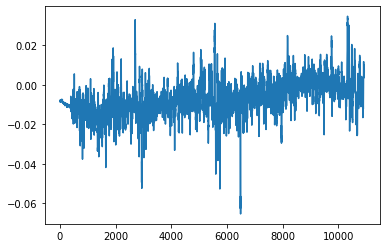

In [68]:
#import Libraries 
import pandas as pd
import numpy as np 
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
# Import sample data to work with
# High Frequency Brent contracts, CO1 & CO2, first and second dated active futures contracts 
# column 'orig' contains the spread to be modeled 
df = pd.read_csv('Sample_set.csv')
# Plot the log spread 
df.orig.plot();

In [69]:
# Function to fit OU process estimate alpha and eta values using linear regression 
# input:
# df - dataframe 
# spread - label for coloumn contained in df with spread
# t1_spread - label for column in for the shifted spread
# returns
# alpha
# eta

def OU_fit_LR(df, spread, t1_spread):
    results = sm.OLS(df[spread],df[t1_spread]).fit()
    alpha = (results.params[0])
    eta = (results.bse[0])
    return alpha, eta 

# Function to fit OU process estimate alpha and eta values using AR(1)
# input:
# df - dataframe 
# spread - label for coloumn contained in df with spread
# returns
# alpha
# eta

def OU_fit_AR1(df, spread):
    model = ARMA(df[spread], order=(1, 0))
    results = model.fit()
    alpha = results.params[1]
    eta = results.bse[1]
    return alpha, eta 


    

In [25]:
# compare result of two functions 
print ('Linear Regression results: \n' )
LR_alpha, LR_eta = OU_fit_LR(df, 'orig', 't1')
print ('Alpha:   ', LR_alpha)
print ('Eta:     ', LR_eta)

print ('\n \nAR(1) results: \n' )
AR_alpha, AR_eta = OU_fit_AR1(df, 'orig')
print ('Alpha:   ', LR_alpha)
print ('Eta:     ', LR_eta)

Linear Regression results: 

Alpha:    0.9702551616607097
Eta:      0.0023149605578142015

 
AR(1) results: 

Alpha:    0.9702551616607097
Eta:      0.0023149605578142015


### Finding a (Maximising Expected Return)
Using equation (18) we can find the value for ${a}$ that maximises expected return for the strategy. Using values obtained for $\alpha$, $\eta$ and transaction costs ${c}$, where ${a} < 0$ and ${m} = -{a}$. 

$${a} = -\frac{c}{4} - \frac{{c}^{2}{\alpha}}{4({c^3}{\alpha^3} + 24{c}{\alpha^2}{\eta^2} -4{\sqrt{3{c^4}{\alpha^5}{\eta^2} + 36{c^2}{\alpha^4}{\eta}}})^{1/3}}- \frac{({c^3}{\alpha^3} + 24{c}{\alpha^2}{\eta^2} -4{\sqrt{3{c^4}{\alpha^5}{\eta^2} +36{c^2}{\alpha^4}{\eta^4}}})^{1/3}}{4{\alpha}}$$

In [73]:
### function - implementaion of maximum expected return
### inputs:
### a - value for alpha
### n - value for eta
### c - transaction costs
### returns:
### res - rseult for a using eq. (18)


def mer(a,n,c):
    var1 = -c/4
    denom1 = (c**3*a**3) + (24*c*a**2*n**2)
    denom2 = 4*(np.sqrt(((3*c**4*a**5*n**2) + (36*c**2*a**4*n**4))))
    denom3 = 4 * ((denom1 - denom2)**(1/3))
    var2 = (c**2*a) / denom3
    numer1 = c**3*a**3 + (24*c*a**2*n**2)
    numer2 = 4 * np.sqrt((3*c**4*a**5*n**2 + 36*c**2*a**4*n**4))
    numer3 = ((numer1 - numer2))**(1/3)
    var3 = numer3 / (4*a)
    res = var1 - var2 - var3
    return res

print ('Test sample: ')
print ('   Alpha:   ', AR_alpha)
print ('   Eta:     ', AR_eta)
t_c = 0.02
print ('   Transaction Cost : ', t_c)
a_param = mer(0.049761115, 0.003020633, t_c)
print ('\n \nEstimated value for a: ', a_param)

Test sample: 
   Alpha:    0.9513703104138301
   Eta:      0.002944044376046845
   Transaction Cost :  0.02

 
Estimated value for a:  -0.021149115615019247


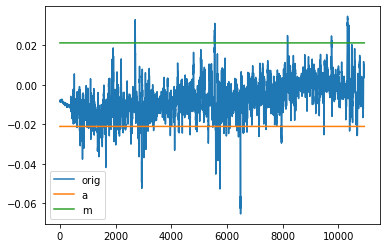

In [74]:
# Plot the spread versus entry and exit values, a & m

df_spread_test = pd.DataFrame(df.orig)
df_spread_test['a'] = a_param
df_spread_test['m'] = a_param * -1
df_spread_test.plot();

In [80]:
### messy backtester function 
df['CO1_ret'] = np.log(df.CO1 / df.CO1.shift())
df['CO2_ret'] = np.log(df.CO2 / df.CO2.shift())

def backtest(df, t_c):
    # create results dictionary
    res_df = pd.DataFrame()
    pnl_vectors = pd.DataFrame()
    for tc in t_c:
        res = {}
        res['transaction cost'] = tc
        #find a & m using maximum expected return formula
        a = -0.021149115615019247
        m = -a
        #store result
        res['Optimal Trade Entry (a)'] = a
        #generate vecoried buy-sell signals 
        #buy when Xt <= a
        df['bs'] = np.where(df.orig <= a, 1, 0)
        #sell when Xt >= m 
        df['bs'] = np.where(df.orig >= m, -1, df.bs)
        #fill neutral signals with previous buy/sell signal 
        df.bs = np.where(df.bs == 0 , df.bs.shift(-1), df.bs)
        #find pnl
        df['pnl'] = df.bs.shift(1) * df.CO1_ret - df.bs.shift(1) * df.CO2_ret
        #store vetor in result dataframe
        pnl_vectors['pnl_tc_' + str(tc)] = df.pnl
        res['total return']= df.pnl.sum()
        res['Sharpe'] = df.pnl.mean() / df.pnl.std() * np.sqrt(6*24*252) 
        trade_count = 0 
        for i in range(1,len(df)):
            if df.loc[i, 'bs'] != df.loc[i-1, 'bs']:
                trade_count += 1
        res['Trade_count'] = trade_count
        res['avg hold period (hrs)'] = 2880 / trade_count 
        res_df = res_df.append(res, ignore_index = True)
    return res_df, pnl_vectors
        
    
bt_results, bt_vectors = backtest(df, [0.0001, 0.002, 0.02])

In [81]:
print (bt_results)

   Optimal Trade Entry (a)    Sharpe  Trade_count  avg hold period (hrs)  \
0                -0.021149  0.510659        233.0              12.360515   
1                -0.021149  0.510659        233.0              12.360515   
2                -0.021149  0.510659        233.0              12.360515   

   total return  transaction cost  
0      0.037011            0.0001  
1      0.037011            0.0020  
2      0.037011            0.0200  


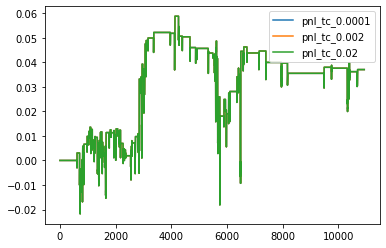

In [82]:
bt_vectors.cumsum().plot()

### Maximum Sharpe ratio
Similarly, an analytic formula can be maximised to find ${a}$ for an optimal Sharpe ratio using equation (20). Again, ${a} < 0$ and ${m} = -{a}$

$$ {S}^*{({a},{c},{r}_{f})} = {\frac{-(2{a}+{c}+{r}_{f}){\sqrt{{\alpha}{\pi}Erfi{(\frac{{a}{\sqrt{\alpha}}}{\eta})}}}}{\sqrt{{(2a + c)^2}{({w}_{1}(\frac{{a}{\sqrt{\alpha}}}{\eta}) + {w}_{2}(\frac{{a}{\sqrt{\alpha}}}{\eta}))}}}} $$

Where, $ Erfi({x}) = iErfi(ix) $ is the imaginary error function 

and,

$$ {w}_{1}({z})=(1/2 \sum_{{k}=1}^\infty \Gamma ({k}/2) (\sqrt{2}{z})^{k} / {k!})^2-(1/2 \sum_{{k}=1}^\infty (-1)^{k} \Gamma ({k}/2) (\sqrt{2}{z})^{k} /{k!})^2$$

$$ {w}_{2}({z}) = \sum_{{k}=1}^\infty \Gamma ((2{k} - 1)/2) \Psi ((2{k} -1)/2) (\sqrt{2} {z})^{(2k -1)} / (2k-1)! $$

In [67]:
results = sm.OLS(df['orig'],df['t1']).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   orig   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          1.757e+05
Date:                Tue, 05 Jan 2021   Prob (F-statistic):                        0.00
Time:                        16:43:33   Log-Likelihood:                          48750.
No. Observations:               10934   AIC:                                 -9.750e+04
Df Residuals:                   10933   BIC:                                 -9.749e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
t1             0.9703      0.002    419.124      0.000       0.966       0.975
==============================================================================
Omnibus:                     1424.478   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17951.805
Skew:                          -0.022   Prob(JB):                         0.00
Kurtosis:                       9.277   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[('co1', 'co2'), ('co1', 'gs1'), ('co1', 'ho1'), ('co1', 'ho2'), ('co2', 'gs1'), ('co2', 'ho1'), ('co2', 'ho2'), ('gs1', 'ho1'), ('gs1', 'ho2'), ('ho1', 'ho2')]


$- \frac{({c^3}{\alpha^3} + 24{c}{\alpha^2}{\eta^2} -4{\sqrt{3{c^4}{\alpha^5}{\eta^2} +36{c^2}{\alpha^4}{\eta^4}}})^{1/3}}{4{\alpha}}$

$${a} = -\frac{c}{4} - \frac{{c}^{2}{\alpha}}{4({c^3}{\alpha^3} + 24{c}{\alpha^2}{\eta^2} -4{\sqrt{3{c^4}{\alpha^5}{\eta^2} + 36{c^2}{\alpha^4}{\eta}}})^{1/3}}- \frac{({c^3}{\alpha^3} + 24{c}{\alpha^2}{\eta^2} -4{\sqrt{3{c^4}{\alpha^5}{\eta^2} +36{c^2}{\alpha^4}{\eta^4}}})^{1/3}}{4{\alpha}}$$

$\frac{-(2{a}+{c}+{r}_{f}){\sqrt{{\alpha}{\pi}Erfi{(\frac{{a}{\sqrt{\alpha}}}{\eta})}}}}{\sqrt{{(2a + c)^2}{({w}_{1}(\frac{{a}{\sqrt{\alpha}}}{\eta}) + {w}_{2}(\frac{{a}{\sqrt{\alpha}}}{\eta}))}}}$

$ {(\frac{{a}{\sqrt{\alpha}}}{\eta})}$

In [ ]:
${4({c^3}{\alpha^3} + 24{c}{\alpha^2}{\eta^2} -4{\sqrt{3{c^4}{\alpha^5}{\eta^2} + 36{c^2}{\alpha^4}{\eta}}})^{1/3}}$